# Run 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import joblib
from pickle import dump
from pandas import read_csv
from pickle import load

%matplotlib inline

In [2]:
from astroquery.ned import Ned
import astropy.units as u
from astropy import coordinates
from astropy.table import Table
import time
from astropy.coordinates import SkyCoord

In [3]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.gaussian_process.kernels import RBF

In [4]:
data_type = input('1: PCA\n 2: Scaled Data\n 3: Raw Data\n')

1: PCA
 2: Scaled Data
 3: Raw Data
1


# PCA & data scaling

In [5]:
df_training =  pd.read_csv("training_set_v2_dr16.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['objid', 'ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'w1', 'w2', 'w3', 'w4', 'link']


In [6]:
print(df_training.groupby('category').size())


category
Contaminant       537
Known galaxies     13
dtype: int64


In [7]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
print(len(features))

15


In [8]:
plt.rcParams.update({'font.size': 20})

In [9]:
# # %matplotlib qt
# fig1 = plt.figure(figsize=(10,8))
# # sns.set_context("paper", font_scale=2)
# # sns.set(font_scale = 1.5)
# ax = sns.pairplot(df_training, 
#              vars = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude'],  hue="category",hue_order = ['Contaminant','Known galaxies'],
#              corner=True,
#              diag_kind = 'kde', 
#              plot_kws = {'alpha': 0.4, 's': 70, 'edgecolor': 'k'},
#              height=3);
# # Title 
# sns.move_legend(ax, "upper left")
# plt.suptitle('Training data pairplots', 
#              size = 30);
# plt.savefig('pair_plot_training_set_v2_dr16.pdf')

In [10]:
# classification as array of 0's and 1's
category = df_training['category']
classification = np.NaN*np.ones(len(category))
classification[category == 'Known galaxies'] = 1  
classification[category == 'Contaminant'] = 0 
print(len(classification))
print(len(classification[classification == 1]))

550
13


In [11]:
# define feature data and standardize it
data = df_training.loc[:,features].values
# define scaler
# scaler = StandardScaler()
scaler = RobustScaler()
# scaler = QuantileTransformer()
# fit scaler on the training dataset
scaler.fit(data)
# transform the training dataset
data_scaled = scaler.transform(data)

In [12]:
# transform data to 6 principle components which take into account 95 pct of the variance in the data
# pca = PCA(n_components = 11, random_state = 2020)

pca = PCA(n_components = 0.95, random_state = 2020) #this automatically chooses the amount of PC's for 95 pct variance

pca.fit(data_scaled)
principal_components = pca.transform(data_scaled)
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6'])
final_df = pd.concat([principal_df, df_training[['category']]], axis = 1)


In [13]:
plt.rcParams.update({'font.size': 10})

Text(0.5, 1.0, 'Influence on each principal component by features')

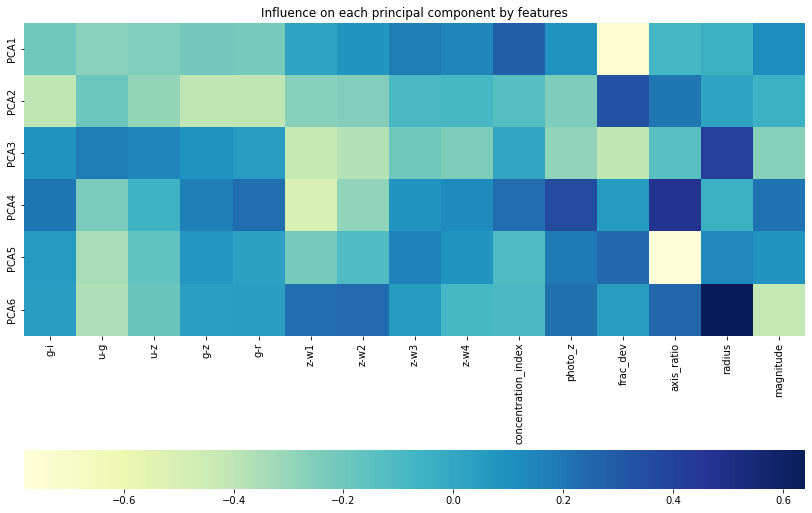

In [14]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

In [15]:
X = principal_components
y = classification

In [16]:
if data_type == 1:
    X = principal_components
    y = classification
elif data_type == 2:
    X = data_scaled
    y = classification
elif data_type == 3:
    X = data
    y = classification

In [17]:
# X = data_scaled
# y = classification

In [18]:
# X = data
# y = classification

In [19]:
# scorign to balanced accuracy
# test svm and plot corner plots showing where its failing and iterate through individual contaminants
# add new corner plots for new 45 galaxy
# try rescaling radius to kpc


# chheck for ways to reduce overfitting maxdepth in decision tree
# ned look at photoz with wise

# Model training

In [21]:
# Spot Check Algorithms
random_state = 2020
models = []
models.append(('LR', LogisticRegression(random_state = 2020,solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state = 2020,gamma='auto')))
models.append(('GP', GaussianProcessClassifier(random_state = 2020)))
models.append(('RF', RandomForestClassifier(random_state = 2020,max_depth=None, n_estimators=100, max_features= 'auto')))
models.append(('MLP', MLPClassifier(random_state = 2020,activation='relu', solver='lbfgs', max_iter=1000,hidden_layer_sizes=(1500,1000,500))))
models.append(('PRCP', Perceptron(random_state = 2020, max_iter=30, tol = 0.001)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=2020, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='balanced_accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# try neural network

LR: 0.500000 (0.000000)
LDA: 0.499067 (0.001616)
KNN: 0.499067 (0.001616)
CART: 0.526790 (0.076732)
NB: 0.498134 (0.001866)
SVM: 0.500000 (0.000000)
GP: 0.499067 (0.001616)
RF: 0.498134 (0.003231)
MLP: 0.663118 (0.138189)
PRCP: 0.489746 (0.015696)


In [23]:
# # voting methods application
# clf1 = LogisticRegression(random_state = 2020,solver='liblinear', multi_class='ovr')
# clf2 = LinearDiscriminantAnalysis()
# clf3 = KNeighborsClassifier()
# clf4 = DecisionTreeClassifier()
# clf5 = GaussianNB()
# clf6 = GaussianProcessClassifier(random_state = 2020)
# clf7 = SVC(random_state = 2020,gamma='auto')
# clf8 = RandomForestClassifier(random_state = 2020,max_depth=None, n_estimators=100, max_features= 'auto')
# clf9 = MLPClassifier(random_state = 2020, activation='relu', solver='lbfgs', max_iter=100000)
# clf10 = Perceptron(random_state = 2020, max_iter=30, tol = 0.001)

# eclf1 = VotingClassifier(estimators=[('SVM', clf7), ('MLP', clf9)], voting='hard')
# eclf1.fit(X, y)
# eclf_predict = eclf1.predict(X)

In [22]:
clf = MLPClassifier(random_state = 2020,activation='relu', solver='lbfgs', max_iter=1000,hidden_layer_sizes=(1500,1000,500))
clf.fit(X,y)
clf_predict = clf.predict(X)

In [24]:
# # save the model
# dump(eclf1, open('voting_model_PCA_v1_dr7.pkl', 'wb'))
# # save the scaler
# dump(scaler, open('scaler_voting_model_PCA_v1_dr7.pkl', 'wb'))
# # save the pca
# dump(pca, open('pca_model_PCA_v1_dr7.pkl', 'wb'))

In [23]:
plt.rcParams.update({'font.size': 20})

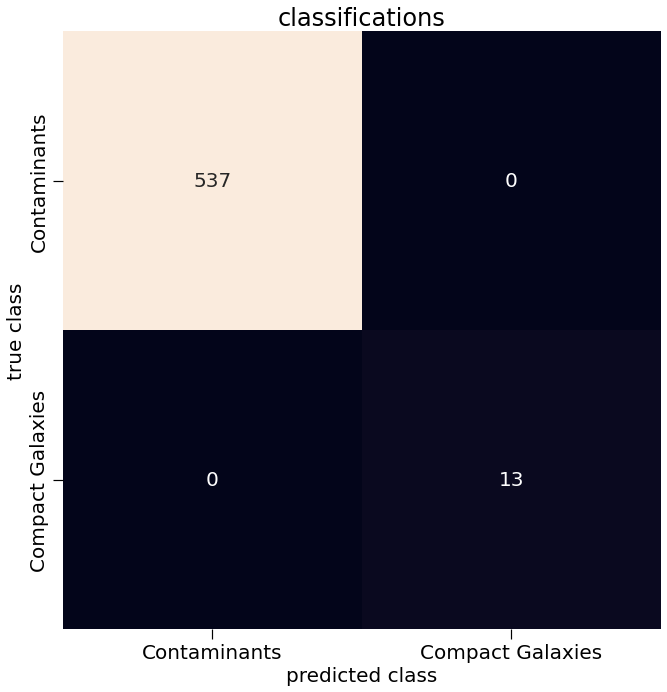

In [24]:
fig1 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y, clf_predict), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Contaminants', 'Compact Galaxies'], yticklabels=['Contaminants', 'Compact Galaxies'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)
plt.savefig('confusion_matrix.png')

# Model application on Atlas3D galaxies

In [25]:
df_atlas3d = pd.read_csv("atlas3d_search_dr16.csv")
columnsNamesArr = df_atlas3d.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['objid', 'ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'w1', 'w2', 'w3', 'w4', 'link']


In [26]:
objid = df_atlas3d['objid']
ra, dec = df_atlas3d['ra'], df_atlas3d['dec']
host_galaxy = df_atlas3d['host_galaxy']
distance = df_atlas3d['distance']
magnitude = df_atlas3d['magnitude']
category = df_atlas3d['category']
radius = df_atlas3d['radius']
u_mag, g_mag, r_mag, i_mag, z_mag = df_atlas3d['u_mag'], df_atlas3d['g_mag'], df_atlas3d['r_mag'], df_atlas3d['i_mag'], df_atlas3d['z_mag']
concentration_index = df_atlas3d['concentration_index']
frac_dev = df_atlas3d['frac_dev']
axis_ratio = df_atlas3d['axis_ratio']
photoz = df_atlas3d['photo_z']
category = df_atlas3d['category']
g_i, u_g, u_z, g_z, g_r = df_atlas3d['g-i'], df_atlas3d['u-g'], df_atlas3d['u-z'], df_atlas3d['g-z'], df_atlas3d['g-r']
magnitude = df_atlas3d['magnitude']
radius = df_atlas3d['radius']
z_w1, z_w2, z_w3, z_w4 = df_atlas3d['z-w1'], df_atlas3d['z-w2'], df_atlas3d['z-w3'], df_atlas3d['z-w4']
w1, w2, w3, w4 = df_atlas3d['w1'], df_atlas3d['w2'], df_atlas3d['w3'], df_atlas3d['w4']

In [27]:
category[category == 'Possible contaminants'] = 'Possible compact galaxies'

C:\Users\Home\AppData\Local\Temp/ipykernel_5948/2455194359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category[category == 'Possible contaminants'] = 'Possible compact galaxies'


In [28]:
#make a link to sdss for this object
objid = np.array(objid)
link = []
for i in range(len(objid)):
    url = 'http://skyserver.sdss.org/dr16/en/tools/explore/Summary.aspx?id=' + str(objid[i])
    link.append(url)
link = np.array(link)

In [29]:
print(df_atlas3d.groupby('category').size())

category
Known galaxies                  13
Possible compact galaxies    16832
dtype: int64


In [30]:
#PCA
X = df_atlas3d.loc[:,features].values
X_scaled = scaler.transform(X)
X_pca_scaled = pca.transform(X_scaled)
y = clf.predict(X_pca_scaled) 

In [31]:
# #Scaled
# X = df_atlas3d.loc[:,features].values
# X_scaled = scaler.transform(X)
# # X_pca_scaled = pca.transform(X_scaled)
# y = eclf1.predict(X_scaled) 

In [32]:
# #Raw
# X = df_atlas3d.loc[:,features].values
# # X_scaled = scaler.transform(X)
# # X_pca_scaled = pca.transform(X_scaled)
# y = eclf1.predict(X) 

In [33]:
index_1a = np.where(y == 1)[0]
print('Voting method:', len(index_1a))
index_1b = np.where(y == 0)[0]

Voting method: 199


In [34]:
# dictionary of lists  
dict = {'objid': objid[index_1a], 'ra': ra[index_1a], 'dec': dec[index_1a], 'g-i': g_mag[index_1a] - i_mag[index_1a], 'u-g': u_mag[index_1a] - g_mag[index_1a], 'u-z': u_mag[index_1a] - z_mag[index_1a], 'g-z': g_mag[index_1a] - z_mag[index_1a], 'g-r': g_mag[index_1a] - r_mag[index_1a],'z-w1': z_w1[index_1a],'z-w2': z_w2[index_1a],'z-w3': z_w3[index_1a],'z-w4': z_w4[index_1a], 'concentration_index': concentration_index[index_1a], 'photo_z': photoz[index_1a], 'frac_dev': frac_dev[index_1a], 'host_galaxy': host_galaxy[index_1a], 'distance': distance[index_1a], 'axis_ratio': axis_ratio[index_1a], 'category': category[index_1a], 'radius': radius[index_1a], 'magnitude': magnitude[index_1a], 'u_mag': u_mag[index_1a], 'g_mag': g_mag[index_1a], 'i_mag': i_mag[index_1a], 'r_mag': r_mag[index_1a], 'z_mag': z_mag[index_1a],'w1': w1[index_1a],'w2': w2[index_1a],'w3': w3[index_1a],'w4': w4[index_1a] , 'link': link[index_1a]}   
df_voting_results= pd.DataFrame(dict) 
    
# saving the dataframe 
df_voting_results.to_csv('voting_results_v2.csv',index = False) 

In [35]:
print(df_voting_results.groupby('category').size())
print('From a total of 871 host galaxies')

category
Known galaxies                13
Possible compact galaxies    186
dtype: int64
From a total of 871 host galaxies


# NED search for possible compact galaxies from 

In [50]:
objid_voting = df_voting_results['objid']
ra_voting, dec_voting = np.array(df_voting_results['ra']), np.array(df_voting_results['dec'])
host_galaxy_voting = df_voting_results['host_galaxy']
distance_voting = df_voting_results['distance']
magnitude_voting = df_voting_results['magnitude']
category_voting = df_voting_results['category']
radius_voting = df_voting_results['radius']
u_mag_voting, g_mag_voting, r_mag_voting, i_mag_voting, z_mag_voting = df_voting_results['u_mag'], df_voting_results['g_mag'], df_voting_results['r_mag'], df_voting_results['i_mag'], df_voting_results['z_mag']
concentration_index_voting = df_voting_results['concentration_index']
frac_dev_voting = df_voting_results['frac_dev']
axis_ratio_voting = df_voting_results['axis_ratio']
photoz_voting = df_voting_results['photo_z']
category_voting = df_voting_results['category']
g_i_voting, u_g_voting, u_z_voting, g_z_voting, g_r_voting = df_voting_results['g-i'], df_voting_results['u-g'], df_voting_results['u-z'], df_voting_results['g-z'], df_voting_results['g-r']
z_w1_voting, z_w2_voting, z_w3_voting, z_w4_voting = df_voting_results['z-w1'],df_voting_results['z-w2'],df_voting_results['z-w3'],df_voting_results['z-w4']
w1_voting, w2_voting, w3_voting, w4_voting = df_voting_results['w1'],df_voting_results['w2'],df_voting_results['w3'],df_voting_results['w4']
link_voting = df_voting_results['link']

In [51]:
name1 = []
ra1 = []
dec1 = []
velocity1 = []
redshift1 = []
flag1 = []
for i in range(len(ra_voting)):
    print(i)
#     if i%200 == 0:
#         time.sleep(15)
    co = coordinates.SkyCoord(ra=ra_voting[i], dec=dec_voting[i], unit=(u.deg, u.deg))
    results = Ned.query_region(co, radius=1* u.arcsec, equinox='J2000.0')
    if len(results) == 0:
        name1_temp, ra1_temp, dec1_temp, vel1_temp, redshift1_temp, flag1_temp = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        name1.append(name1_temp)
        ra1.append(ra1_temp)
        dec1.append(dec1_temp)
        velocity1.append(vel1_temp)
        redshift1.append(redshift1_temp)
        flag1.append(flag1_temp)
    else:
        name1_temp, ra1_temp, dec1_temp, vel1_temp, redshift1_temp, flag1_temp = results['Object Name'], results['RA'], results['DEC'], results['Velocity'], results['Redshift'], results['Redshift Flag']
        for j in range(len(name1_temp)):
            name1.append(name1_temp[j])
            ra1.append(ra1_temp[j])
            dec1.append(dec1_temp[j])
            velocity1.append(vel1_temp[j])
            redshift1.append(redshift1_temp[j])
            flag1.append(flag1_temp[j])

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


WARNING

18


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


19


20


21


22
23


24


25


26


27


28


29


30


31


32


33


WARNING

34


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


WARNING

59
60


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


61
62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84
85


86


87


88


89


WARNING

90


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

91


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

92


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


93


94


95


96


97


98


99


WARNING

100
101

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


102


103


104


105


106


107


108
109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


WARNING

130


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146


147


148


149


150


151


152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174


WARNING

175


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


176


177


178


179


180


181


182


183


184


185


186


187


188


189


190


191


192


193


194


195


196


197


198


199


200
201


202


203


204


205


206


207


208


209


210


211


212


213


214


215


216


217


218


219


220


221


222


223


224


225


226
227


228


229


230


231


232


233


234


235


236


237


238


239


240


241


242


243


244


245


246


247


248


249


250


251


252


253


254


255


256


257


258


259


260


261


262


263


264


265


266


267


268


269


270


271


272


273


274


275


276


277


278


279


280


281


282


283


284


285


286


287


288


289


290


291


292


293


294


295


296


297


298


299


300


301


302


303


304


305


306


307


WARNING

308


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


309


WARNING

310


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


311


312


313


314
315


316


317


318


319


320


321


322


323


324


325


326


327


328


In [52]:
# dictionary of lists  
dict = {'name': name1, 'ra': ra1, 'dec': dec1, 'velocity': velocity1, 'redshift': redshift1, 'flag': flag1}  
df_ned_voting = pd.DataFrame(dict) 
    
# saving the dataframe 
# df1.to_csv('ned_compact_dr7.csv') 

# NED (with specz > 0.01) and ML results crossmatching

In [53]:
ra_ned_voting, dec_ned_voting, name_ned_voting, velocity_ned_voting, redshift_ned_voting, flag_ned_voting = df_ned_voting['ra'], df_ned_voting['dec'], df_ned_voting['name'], df_ned_voting['velocity'], df_ned_voting['redshift'], df_ned_voting['flag']

In [54]:
redshift_ned_voting_1a = redshift_ned_voting.copy()
redshift_ned_voting_1a[redshift_ned_voting_1a == '--'] = np.nan
redshift_ned_voting_1a = redshift_ned_voting_1a.astype(float)

voting_specz_over = (redshift_ned_voting_1a > 0.01) & (flag_ned_voting == 'SPEC')

C:\Users\Home\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [55]:
ra_ned_voting_1 = np.array(ra_ned_voting[voting_specz_over])
dec_ned_voting_1 = np.array(dec_ned_voting[voting_specz_over])
name_ned_voting_1 =  np.array(name_ned_voting[voting_specz_over])
velocity_ned_voting_1 = np.array(velocity_ned_voting[voting_specz_over])
redshift_ned_voting_1 = np.array(redshift_ned_voting[voting_specz_over]).astype(float)
flag_ned_voting_1 = np.array(flag_ned_voting[voting_specz_over])

In [56]:
c1 = SkyCoord(ra=ra_voting*u.degree, dec=dec_voting*u.degree)
catalog1 = SkyCoord(ra=ra_ned_voting_1*u.degree, dec=dec_ned_voting_1*u.degree)
idx_1, d2d_1, d3d_1 = c1.match_to_catalog_sky(catalog1)

In [57]:
max_sep = 1 * u.arcsec
sep_constraint_1 = d2d_1 < max_sep
c1_matches = c1[sep_constraint_1]
catalog1_matches = catalog1[idx_1[sep_constraint_1]]

In [58]:
objid_training = df_training['objid']
ra_training, dec_training = df_training['ra'], df_training['dec']
host_galaxy_training = df_training['host_galaxy']
distance_training = df_training['distance']
magnitude_training = df_training['magnitude']
category_training = df_training['category']
radius_training = df_training['radius']
u_mag_training, g_mag_training, r_mag_training, i_mag_training, z_mag_training = df_training['u_mag'], df_training['g_mag'], df_training['r_mag'], df_training['i_mag'], df_training['z_mag']
concentration_index_training = df_training['concentration_index']
frac_dev_training = df_training['frac_dev']
axis_ratio_training = df_training['axis_ratio']
photoz_training = df_training['photo_z']
category_training = df_training['category']
g_i_training, u_g_training, u_z_training, g_z_training, g_r_training = df_training['g-i'], df_training['u-g'], df_training['u-z'], df_training['g-z'], df_training['g-r']
w1_training, w2_training, w3_training, w4_training = df_training['w1'],df_training['w2'],df_training['w3'],df_training['w4']
z_w1_training, z_w2_training,z_w3_training,z_w4_training = df_training['z-w1'],df_training['z-w2'],df_training['z-w3'],df_training['z-w4']
link_training = df_training['link']

In [59]:
category_voting[sep_constraint_1] = 'Contaminant'

C:\Users\Home\AppData\Local\Temp/ipykernel_4044/354860432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_voting[sep_constraint_1] = 'Contaminant'


# Creating new training data:
## Adding original training set + NED confirmed contaminants

In [60]:
objid_final = np.concatenate((objid_training,objid_voting[sep_constraint_1]))
ra_final, dec_final = np.concatenate((ra_training,ra_voting[sep_constraint_1])), np.concatenate((dec_training,dec_voting[sep_constraint_1]))
host_galaxy_final = np.concatenate((host_galaxy_training,host_galaxy_voting[sep_constraint_1]))
distance_final = np.concatenate((distance_training,distance_voting[sep_constraint_1]))
magnitude_final = np.concatenate((magnitude_training,magnitude_voting[sep_constraint_1]))
category_final = np.concatenate((category_training,category_voting[sep_constraint_1]))
radius_final = np.concatenate((radius_training,radius_voting[sep_constraint_1]))
u_mag_final, g_mag_final, r_mag_final, i_mag_final, z_mag_final = np.concatenate((u_mag_training,u_mag_voting[sep_constraint_1])), np.concatenate((g_mag_training,g_mag_voting[sep_constraint_1])), np.concatenate((r_mag_training,r_mag_voting[sep_constraint_1])), np.concatenate((i_mag_training,i_mag_voting[sep_constraint_1])), np.concatenate((z_mag_training,z_mag_voting[sep_constraint_1]))
concentration_index_final = np.concatenate((concentration_index_training,concentration_index_voting[sep_constraint_1]))
frac_dev_final = np.concatenate((frac_dev_training,frac_dev_voting[sep_constraint_1]))
axis_ratio_final = np.concatenate((axis_ratio_training,axis_ratio_voting[sep_constraint_1]))
photoz_final = np.concatenate((photoz_training,photoz_voting[sep_constraint_1]))
category_final = np.concatenate((category_training,category_voting[sep_constraint_1]))
g_i_final, u_g_final, u_z_final, g_z_final, g_r_final = np.concatenate((g_i_training,g_i_voting[sep_constraint_1])), np.concatenate((u_g_training,u_g_voting[sep_constraint_1])), np.concatenate((u_z_training,u_z_voting[sep_constraint_1])), np.concatenate((g_z_training,g_z_voting[sep_constraint_1])), np.concatenate((g_r_training,g_r_voting[sep_constraint_1]))
z_w1_final, z_w2_final, z_w3_final, z_w4_final = np.concatenate((z_w1_training, z_w1_voting[sep_constraint_1])),np.concatenate((z_w2_training, z_w2_voting[sep_constraint_1])),np.concatenate((z_w3_training, z_w3_voting[sep_constraint_1])), np.concatenate((z_w4_training, z_w4_voting[sep_constraint_1]))
w1_final, w2_final, w3_final, w4_final = np.concatenate((w1_training, w1_voting[sep_constraint_1])), np.concatenate((w2_training, w2_voting[sep_constraint_1])), np.concatenate((w3_training, w3_voting[sep_constraint_1])),  np.concatenate((w4_training, w4_voting[sep_constraint_1]))
link_final = np.concatenate((link_training,link_voting[sep_constraint_1]))

In [61]:
# dictionary of lists  
dict = {'objid': objid_final, 'ra': ra_final, 'dec': dec_final, 'g-i': g_i_final, 'u-g': u_g_final, 'u-z': u_z_final, 'g-z': g_z_final, 'g-r': g_r_final,'z-w1': z_w1_final, 'z-w2': z_w2_final,'z-w3': z_w3_final,'z-w4': z_w4_final,'concentration_index': concentration_index_final, 'photo_z': photoz_final, 'frac_dev': frac_dev_final, 'host_galaxy': host_galaxy_final, 'distance': distance_final, 'axis_ratio': axis_ratio_final, 'category': category_final, 'radius': radius_final, 'magnitude': magnitude_final, 'u_mag': u_mag_final, 'g_mag': g_mag_final, 'i_mag': i_mag_final, 'r_mag': r_mag_final, 'z_mag': z_mag_final, 'w1': w1_final, 'w2': w2_final,'w3': w3_final,'w4': w4_final, 'link': link_final}  
df_training_v2 = pd.DataFrame(dict) 
    
# saving the dataframe 
df_training_v2.to_csv('training_v2_dr7.csv') 

In [62]:
print(df_training_v2 .groupby('category').size())

category
Contaminant       320
Known galaxies     13
dtype: int64
